In [1]:
import numpy as np
from qutip import *
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import math
from numpy import sqrt,array,isclose,linspace
import matplotlib.pyplot as plt
from numpy import *

In [2]:
from modules.spin_arch import *
from modules.su_algebra import *

In [3]:
from IPython.display import Latex

In [4]:
Ntrunc = 3 #global operator for truncation level or total number of dimensions

In [5]:
#initialize system
N = 4
Nlevel = Ntrunc

# Ej, Ec, g_arr, omega = generate_tmon_arch(N,Nlevel,o=59.87)
Ej, Ec, g_arr, omega = generate_tmon_arch(N,Nlevel)
sys1 = tmon_system(N, Nlevel, Ec, Ej, g_arr, omega)

In [6]:
sys1.freq_list()

[[0.0, 60.745553203367585, 118.99110640673517],
 [0.0, 60.745553203367585, 118.99110640673517],
 [0.0, 60.745553203367585, 118.99110640673517],
 [0.0, 60.745553203367585, 118.99110640673517]]

In [7]:
# a=0.40824829
# b=0.70710678
# c=0.57735027

a=1
b=sqrt(2)
c=1

In [8]:
psi_2 = a*basis(Nlevel,0) + b*sqrt(1)*basis(Nlevel,1) + c*basis(Nlevel,2)
psi_2 = psi_2/psi_2.norm()
psi_2 = psi_2 * psi_2.dag()
psi_2
rho=tensor([psi_2]*N) #sys1.tensor_projection_op(0,1,1, dim = None)

In [9]:
psi_3 = a*basis(Nlevel,0) +b*sqrt(1)*basis(Nlevel,1) + c*basis(Nlevel,2)
psi_3 = psi_3/psi_3.norm()
psi_3 = psi_3 * psi_3.dag()

rho_0=tensor([psi_3]*N)
# psi_3

In [10]:
# Spin 1
# Sx=Qobj(ensemble_op(op_padded2(Qobj(np.array([[0,sqrt(2),0],[sqrt(2),0,sqrt(2)],[0,sqrt(2),0]])/2),Nlevel), N))
# Sy=Qobj(ensemble_op(op_padded2(Qobj(1j*np.array([[0,-sqrt(2),0],[sqrt(2),0,-sqrt(2)],[0,sqrt(2),0]])/2),Nlevel), N))
# Sz=Qobj(ensemble_op(op_padded2(Qobj(np.array([[1,0,0],[0,0,0],[0,0,-1]])),Nlevel), N))

# Spin 1/2
Sx=Qobj(ensemble_op(op_padded(Qobj(np.array([[0,1,0],[1,0,1],[0,1,0]])/np.sqrt(2)),Nlevel), N))
Sy=Qobj(ensemble_op(op_padded(Qobj(1j*np.array([[0,-1,0],[1,0,-1],[0,1,0]])/np.sqrt(2)),Nlevel), N))
Sz=Qobj(ensemble_op(op_padded(Qobj(np.array([[1,0,0],[0,0,0],[0,0,-1]])),Nlevel), N))


Jsq=Sx**2+Sy**2+Sz**2
# Jsq=Qobj(array(Jsq))
Jp=Sx+1j*Sy
# Jp=Qobj(array(Jp))
Jm=Sx-1j*Sy
# Jm=Qobj(array(Jm))

In [11]:
# Phi theta calculation

nl=0

arr=[0,0,1]
# arr=[0,1,0]

def rot_basis(arr=arr):

    # Finding Eigenstates of Sz
    eigenvalues, eigenvectors = Sz.eigenstates()

    temp=(tensor([Qobj(zeros(3))]*4))*(tensor([Qobj(zeros(3))]*4)).dag()

    Sz_hist=zeros(2*N+1)
    ebasis=[temp]*(2*N+1)
    
    for i in range(len(eigenvalues)):
        j=eigenvalues[i]
        Sz_hist[int(j+4)]+=1
        ebasis[int(j+4)]+=(eigenvectors[i]*eigenvectors[i].dag())


    # Finding angle to rotate into
    n1=sqrt(arr[0]**2+arr[1]**2)
    if n1==0:
        phi=0
    else:
        phi=arccos(arr[0]/n1)+pi/2
    theta=pi/2-arccos(n1)

    # Rotating in the required basis
    tlist=linspace(0,theta+0.0001,100)
    H=cos(phi)*Sx+sin(phi)*Sy
    n=0
    for i in (ebasis):
    #     options=Options()
    #     options.
        res1=mesolve(H,i,tlist,[],[], progress_bar=None)
        ebasis[n]=res1.states[-1]
        n+=1

    return ebasis

In [12]:
nlx=rot_basis([1,0,0])
nly=rot_basis([0,1,0])
nlz=rot_basis([0,0,1])
array_rot_basis=array([-0.318,0.947,0.047])
nl_sugg=rot_basis(array_rot_basis/linalg.norm(array_rot_basis))

In [13]:
# eigenvalues, eigenvectors = Sy.eigenstates()
# (nly[-2]*eigenvectors[-2]).norm()

In [14]:
H = sys1.H_I()
H_ph= 0.8*Sz+0.6*Sx
# H_ph= Sx



55 0.0 -0.08702382212855324
55 60.745553203367585 -0.30811388300841913
55 0.0 -0.08702382212855324
55 60.745553203367585 -0.30811388300841913
55 0.0 -0.08702382212855324
55 60.745553203367585 -0.30811388300841913
55 0.0 -0.08702382212855324
55 60.745553203367585 -0.30811388300841913
55 0.0 -0.08702382212855324
55 60.745553203367585 -0.30811388300841913
55 0.0 -0.08702382212855324
55 60.745553203367585 -0.30811388300841913
55 0.0 -0.08702382212855324
55 60.745553203367585 -0.30811388300841913
55 0.0 -0.08702382212855324
55 60.745553203367585 -0.30811388300841913
55 0.0 -0.08702382212855324
55 60.745553203367585 -0.30811388300841913
55 0.0 -0.08702382212855324
55 60.745553203367585 -0.30811388300841913
55 0.0 -0.08702382212855324
55 60.745553203367585 -0.30811388300841913
55 0.0 -0.08702382212855324
55 60.745553203367585 -0.30811388300841913


In [15]:
H

Quantum object: dims = [[3, 3, 3, 3], [3, 3, 3, 3]], shape = (81, 81), type = oper, isherm = True
Qobj data =
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

In [16]:
# Function for Eigenspectrum
def eigenspectrum(rho,nl=0):
    if nl==0:
        nl=rot_basis()
    prob=[]
    for i in nl:
        prob.append(expect(rho,i*i.dag()))
    return array(prob)

In [17]:
def hell_dist(rho,rho_0,nl):
    return 1-sum(sqrt(eigenspectrum(rho,nl)*eigenspectrum(rho_0,nl)))

In [18]:
# t1=5.2525,t2=15.5555
def time_evol(rho,t_ph=0.001,t1=28,t2=43.5,H_ph=H_ph,H=H):
    # First part: entanglement generation
    times = np.linspace(0,t1,100) 
    options = Options()
    options.store_final_state = True
    rho = mesolve(H, rho, times, [], options = options, progress_bar=True).states[-1]

#     Second part: phase encoding

    times = np.linspace(0,t_ph,int(t_ph+10)) #time scale is ~ 1/freq of self energy 
    options = Options()
    options.store_final_state = True
    rho = mesolve(H_ph, rho, times, [], options = options, progress_bar=True).states[-1]

    # Third part: entanglement decoding
    times = np.linspace(0,t2,100) #time scale is ~ 1/freq of self energy 
    options = Options()
    options.store_final_state = True
    rho = mesolve(H, rho, times, [], options = options, progress_bar=True).states[-1]

    return rho

In [37]:
t_ph=0.000001
# rho_0=time_evol(rho,t_ph)
rho_0=time_evol(rho,t_ph,t1=0.0000001,t2=0.0000001)

10.0%. Run time:   0.01s. Est. time left: 00:00:00:00
20.0%. Run time:   0.01s. Est. time left: 00:00:00:00
30.0%. Run time:   0.01s. Est. time left: 00:00:00:00
40.0%. Run time:   0.02s. Est. time left: 00:00:00:00
50.0%. Run time:   0.02s. Est. time left: 00:00:00:00
60.0%. Run time:   0.02s. Est. time left: 00:00:00:00
70.0%. Run time:   0.03s. Est. time left: 00:00:00:00
80.0%. Run time:   0.03s. Est. time left: 00:00:00:00
90.0%. Run time:   0.03s. Est. time left: 00:00:00:00
Total run time:   0.03s
10.0%. Run time:   0.01s. Est. time left: 00:00:00:00
20.0%. Run time:   0.01s. Est. time left: 00:00:00:00
30.0%. Run time:   0.01s. Est. time left: 00:00:00:00
40.0%. Run time:   0.01s. Est. time left: 00:00:00:00
50.0%. Run time:   0.02s. Est. time left: 00:00:00:00
60.0%. Run time:   0.02s. Est. time left: 00:00:00:00
70.0%. Run time:   0.02s. Est. time left: 00:00:00:00
80.0%. Run time:   0.02s. Est. time left: 00:00:00:00
90.0%. Run time:   0.02s. Est. time left: 00:00:00:00
Tota

In [38]:
t_ph=0.01

# a=time_evol(rho,t_ph)
a=time_evol(rho,t_ph,t1=0.0000001,t2=0.0000001)

10.0%. Run time:   0.01s. Est. time left: 00:00:00:00
20.0%. Run time:   0.01s. Est. time left: 00:00:00:00
30.0%. Run time:   0.02s. Est. time left: 00:00:00:00
40.0%. Run time:   0.02s. Est. time left: 00:00:00:00
50.0%. Run time:   0.03s. Est. time left: 00:00:00:00
60.0%. Run time:   0.03s. Est. time left: 00:00:00:00
70.0%. Run time:   0.03s. Est. time left: 00:00:00:00
80.0%. Run time:   0.03s. Est. time left: 00:00:00:00
90.0%. Run time:   0.04s. Est. time left: 00:00:00:00
Total run time:   0.04s
10.0%. Run time:   0.01s. Est. time left: 00:00:00:00
20.0%. Run time:   0.01s. Est. time left: 00:00:00:00
30.0%. Run time:   0.01s. Est. time left: 00:00:00:00
40.0%. Run time:   0.01s. Est. time left: 00:00:00:00
50.0%. Run time:   0.01s. Est. time left: 00:00:00:00
60.0%. Run time:   0.01s. Est. time left: 00:00:00:00
70.0%. Run time:   0.01s. Est. time left: 00:00:00:00
80.0%. Run time:   0.02s. Est. time left: 00:00:00:00
90.0%. Run time:   0.02s. Est. time left: 00:00:00:00
Tota

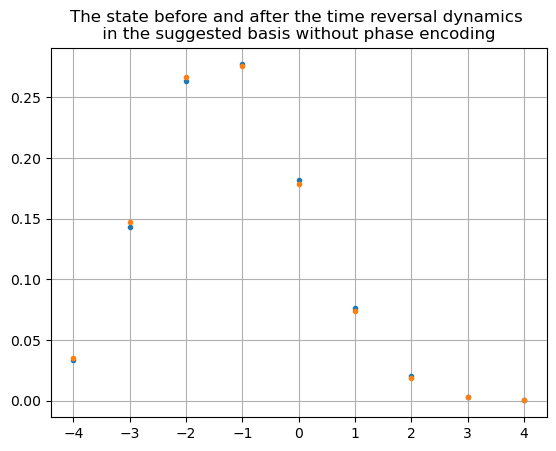

In [39]:
ang=linspace(-N,N,int(2*(N)+1))
# plt.plot(ang,(eigenspectrum(time_evol(rho,t_ph),nly)),".")
plt.plot(ang,(eigenspectrum(a,nl_sugg)),".")
plt.grid()
plt.plot(ang,(eigenspectrum(rho_0,nl_sugg)),".")
# plt.plot(ang,(eigenspectrum(rho,nl_sugg)),".")

# plt.legend(["after","before"])
plt.title("The state before and after the time reversal dynamics \n in the suggested basis without phase encoding ")
plt.show()

In [40]:
# a=time_evol(rho,t_ph)
hell_dist(a,rho_0,nly),hell_dist(a,rho_0,nl_sugg)

(6.932042377483238e-05, 6.799863917139604e-05)

In [23]:
Snew=Sy

var=sqrt(((Snew**2)*a).tr()-((Snew*a).tr())**2)

((Snew*a).tr()-(Snew*rho_0).tr())/var

(0.021301971237451284+1.3107827607772083e-16j)

In [24]:
newnorm=sqrt(0.318**2+0.947**2+0.047**2)
Snew=-0.318*Sx+0.947*Sy+0.047*Sz

var=sqrt(((Snew**2)*a).tr()-((Snew*a).tr())**2)

((Snew*a).tr()-(Snew*rho_0).tr())/var

(0.022331313858629957+3.5346392180772896e-16j)

In [25]:
sqrt(0.318**2+0.947**2+0.047**2)

1.0000709974796789

In [26]:
t_ph=0.002

In [27]:
arr1=[0.76894092,0.62212189,0.14728953]
arr2=[0,1,0]
nl=[rot_basis(arr1),rot_basis(arr2)]
hdist=[]
rho1=time_evol(rho,t_ph)
for i in nl:
    hdist.append(hell_dist(rho1,rho_0,i))
print(hdist)

10.0%. Run time:   0.05s. Est. time left: 00:00:00:00
20.0%. Run time:   0.10s. Est. time left: 00:00:00:00
30.0%. Run time:   0.15s. Est. time left: 00:00:00:00
40.0%. Run time:   0.20s. Est. time left: 00:00:00:00
50.0%. Run time:   0.25s. Est. time left: 00:00:00:00
60.0%. Run time:   0.31s. Est. time left: 00:00:00:00
70.0%. Run time:   0.36s. Est. time left: 00:00:00:00
80.0%. Run time:   0.42s. Est. time left: 00:00:00:00
90.0%. Run time:   0.47s. Est. time left: 00:00:00:00
Total run time:   0.52s
10.0%. Run time:   0.01s. Est. time left: 00:00:00:00
20.0%. Run time:   0.01s. Est. time left: 00:00:00:00
30.0%. Run time:   0.01s. Est. time left: 00:00:00:00
40.0%. Run time:   0.01s. Est. time left: 00:00:00:00
50.0%. Run time:   0.01s. Est. time left: 00:00:00:00
60.0%. Run time:   0.02s. Est. time left: 00:00:00:00
70.0%. Run time:   0.02s. Est. time left: 00:00:00:00
80.0%. Run time:   0.03s. Est. time left: 00:00:00:00
90.0%. Run time:   0.03s. Est. time left: 00:00:00:00
Tota

In [28]:
t_ph=linspace(0.00000001,0.02,10)
arr1=[0,1,0]
arr2=array([0,9.32410521e-01,2.69307118e-01])/0.9705234172738736
nl=[rot_basis(arr1),rot_basis(arr2)]
hdist=[]

for i in tqdm(t_ph):
    rho1=time_evol(rho,i)
    temp=[]
    for i in nl:
        temp.append(hell_dist(rho1,rho_0,i))
    hdist.append(temp)
hdist=array(hdist)

  0%|          | 0/10 [00:00<?, ?it/s]

10.0%. Run time:   0.04s. Est. time left: 00:00:00:00
20.0%. Run time:   0.09s. Est. time left: 00:00:00:00
30.0%. Run time:   0.13s. Est. time left: 00:00:00:00
40.0%. Run time:   0.16s. Est. time left: 00:00:00:00
50.0%. Run time:   0.20s. Est. time left: 00:00:00:00
60.0%. Run time:   0.23s. Est. time left: 00:00:00:00
70.0%. Run time:   0.27s. Est. time left: 00:00:00:00
80.0%. Run time:   0.30s. Est. time left: 00:00:00:00
90.0%. Run time:   0.33s. Est. time left: 00:00:00:00
Total run time:   0.36s
10.0%. Run time:   0.01s. Est. time left: 00:00:00:00
20.0%. Run time:   0.01s. Est. time left: 00:00:00:00
30.0%. Run time:   0.01s. Est. time left: 00:00:00:00
40.0%. Run time:   0.01s. Est. time left: 00:00:00:00
50.0%. Run time:   0.02s. Est. time left: 00:00:00:00
60.0%. Run time:   0.02s. Est. time left: 00:00:00:00
70.0%. Run time:   0.02s. Est. time left: 00:00:00:00
80.0%. Run time:   0.02s. Est. time left: 00:00:00:00
90.0%. Run time:   0.02s. Est. time left: 00:00:00:00
Tota

20.0%. Run time:   0.02s. Est. time left: 00:00:00:00
30.0%. Run time:   0.02s. Est. time left: 00:00:00:00
40.0%. Run time:   0.02s. Est. time left: 00:00:00:00
50.0%. Run time:   0.03s. Est. time left: 00:00:00:00
60.0%. Run time:   0.03s. Est. time left: 00:00:00:00
70.0%. Run time:   0.03s. Est. time left: 00:00:00:00
80.0%. Run time:   0.03s. Est. time left: 00:00:00:00
90.0%. Run time:   0.04s. Est. time left: 00:00:00:00
Total run time:   0.04s
10.0%. Run time:   0.08s. Est. time left: 00:00:00:00
20.0%. Run time:   0.16s. Est. time left: 00:00:00:00
30.0%. Run time:   0.24s. Est. time left: 00:00:00:00
40.0%. Run time:   0.33s. Est. time left: 00:00:00:00
50.0%. Run time:   0.42s. Est. time left: 00:00:00:00
60.0%. Run time:   0.47s. Est. time left: 00:00:00:00
70.0%. Run time:   0.53s. Est. time left: 00:00:00:00
80.0%. Run time:   0.60s. Est. time left: 00:00:00:00
90.0%. Run time:   0.68s. Est. time left: 00:00:00:00
Total run time:   0.75s
10.0%. Run time:   0.10s. Est. tim

(0.0, 9e-05)

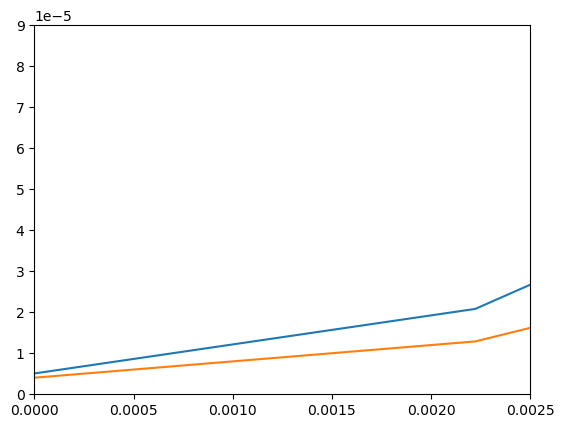

In [29]:
plt.plot(t_ph,hdist.transpose()[0])
plt.plot(t_ph,hdist.transpose()[1])
plt.xlim([0,0.0025])
plt.ylim([0,0.00009])

10.0%. Run time:   0.07s. Est. time left: 00:00:00:00
20.0%. Run time:   0.11s. Est. time left: 00:00:00:00
30.0%. Run time:   0.15s. Est. time left: 00:00:00:00
40.0%. Run time:   0.21s. Est. time left: 00:00:00:00
50.0%. Run time:   0.26s. Est. time left: 00:00:00:00
60.0%. Run time:   0.31s. Est. time left: 00:00:00:00
70.0%. Run time:   0.37s. Est. time left: 00:00:00:00
80.0%. Run time:   0.44s. Est. time left: 00:00:00:00
90.0%. Run time:   0.49s. Est. time left: 00:00:00:00
Total run time:   0.52s
10.0%. Run time:   0.01s. Est. time left: 00:00:00:00
20.0%. Run time:   0.01s. Est. time left: 00:00:00:00
30.0%. Run time:   0.01s. Est. time left: 00:00:00:00
40.0%. Run time:   0.01s. Est. time left: 00:00:00:00
50.0%. Run time:   0.02s. Est. time left: 00:00:00:00
60.0%. Run time:   0.02s. Est. time left: 00:00:00:00
70.0%. Run time:   0.02s. Est. time left: 00:00:00:00
80.0%. Run time:   0.02s. Est. time left: 00:00:00:00
90.0%. Run time:   0.02s. Est. time left: 00:00:00:00
Tota

ValueError: x and y must have same first dimension, but have shapes (5,) and (9,)

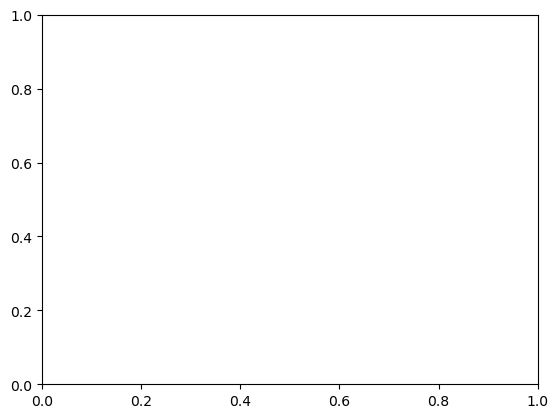

In [30]:
ang=linspace(-N/2,N/2,int(2*(N/2)+1))
plt.plot(array(ang),(eigenspectrum(time_evol(rho,0.0001),nl[0])),'.')
plt.plot(array(ang),(eigenspectrum(rho_0,nl[0])),'.')

In [ ]:
arr2=[[0],[9.32410521e-01],[2.69307118e-01]]
Qobj(arr2).norm()